### **Title : Using Age and Maximum Heart Rate to Determine a Patient's Risk of Heart Disease**

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(stringr)
options(repr.matrix.max.rows = 6)
set.seed(10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

- Packages containing functions required for the following classification model. This include packages for code required for classification functions and graphing of scatterplots, bargraphs and line graphs to visualize dataset and classfication model.

**Introduction:**


**Methods:**


In [2]:
cleveland_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
colnames(cleveland_data)<-c("age","sex","chest_pain","rest_bps","cholestrol_level","high_fbs?",
                            "rest_electrographics","max_heartrate","exercise_induced_angina","oldpeak","slope",
                            "colored_major_vessels","thal","risk_level")
cleveland_data


New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,rest_bps,cholestrol_level,high_fbs?,rest_electrographics,max_heartrate,exercise_induced_angina,oldpeak,slope,colored_major_vessels,thal,risk_level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Table 1:** Initial heart disease dataset before cleaning and wrangling occurs. As the original datframe did not have column names, they have been provided to help provide better clarity for each potential predictor variable.

Included below is the data dictionary created for our specific dataframe using descriptions from the source (UCI Machine Learning Repository)

age(numerical): age in years

sex: sex (1 = male; 0 = female)
chest_pain: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

rest_bps(numerical): resting blood pressure (in mm Hg on admission to the hospital)

cholestrol_level(numerical): serum cholestoral in mg/dl

high_fbs?: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_electrographics: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

max_heartrate(numerical): maximum heart rate achieved

exercise_induced_angina: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

colored_major_vessels: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

risk_level: diagnosis of heart disease (angiographic disease status)
-- presence (values 1,2,3,4) from absence (value 0)

- There are 4 numerical variables in the dataset that can potentially act as our predictor variables for our classification algorithm model predicting risk_level. In order to determine which variables to use for our predictors, the variables are visualized in histograms to observe if an an presence or absence of heart disease risk correlate with higher or lower variable values.

In [30]:
set.seed(1000)

cleveland_clean<-cleveland_data|>
                select(age, rest_bps, max_heartrate, cholestrol_level, risk_level)|>
                mutate(risk_level=case_when(risk_level==0~"Absent",risk_level==1~"Present",
                                         risk_level==2~"Present",risk_level==3~"Present",risk_level==4~"Present"))

cleveland_split <- initial_split(cleveland_clean, prop = 0.75, strata = risk_level)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)
cleveland_train
cleveland_test

age,rest_bps,max_heartrate,cholestrol_level,risk_level
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
37,130,187,250,Absent
56,120,178,236,Absent
57,140,148,192,Absent
⋮,⋮,⋮,⋮,⋮
57,140,123,241,Present
57,130,115,131,Present
57,130,174,236,Present


age,rest_bps,max_heartrate,cholestrol_level,risk_level
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
41,130,172,204,Absent
62,140,160,268,Present
57,120,163,354,Absent
⋮,⋮,⋮,⋮,⋮
58,125,144,220,Absent
45,110,132,264,Present
68,144,141,193,Present


**Table 2:** Clean, wranglend and split original dataset to Training(75%) and Testing(25%). Training data will be used to design predictive model (classifier) in the following code.

In [33]:
predictor_summary<- cleveland_train |>
                        group_by(risk_level) |>
                        summarize(across(age:cholestrol_level, mean)) |>
                        rename("Mean Age" = age,
                                "Mean Rest_BPS"=rest_bps,
                               "Mean Maximum Heartrate" = max_heartrate,
                               "Mean Cholestrol Level"=cholestrol_level,
                               "Risk Level" = risk_level)

predictor_summary

Risk Level,Mean Age,Mean Rest_BPS,Mean Maximum Heartrate,Mean Cholestrol Level
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Absent,51.80328,128.4180,159.5328,244.8689
Present,56.66346,134.4615,139.9904,248.1346


**Table 3:** Summary table calculating the average values of each potential predictive variable between patients are and are not classified as at risk of heart disease.

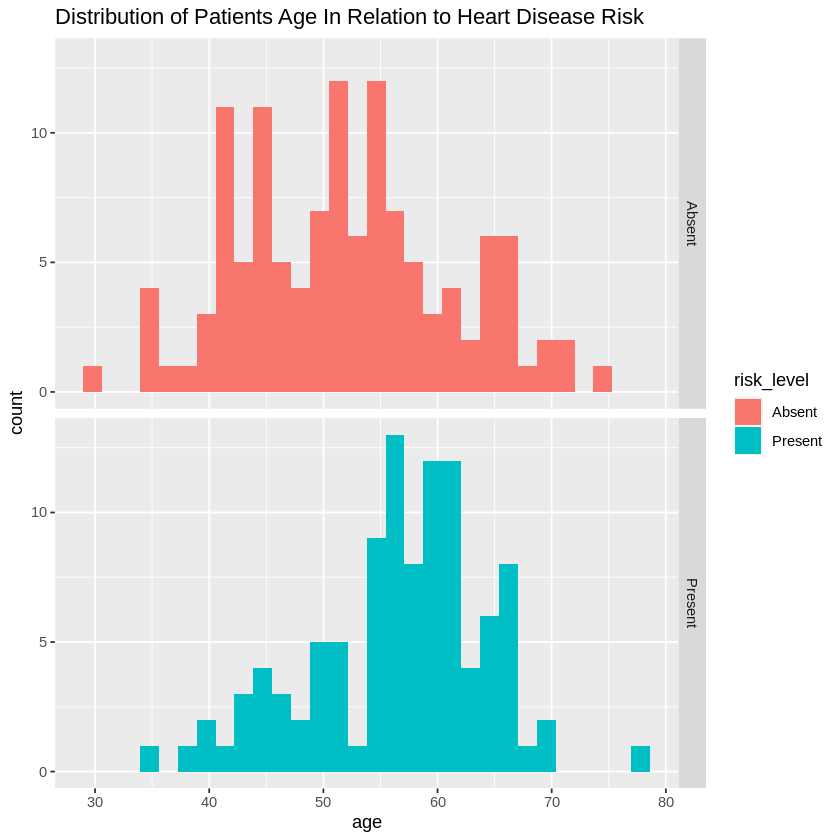

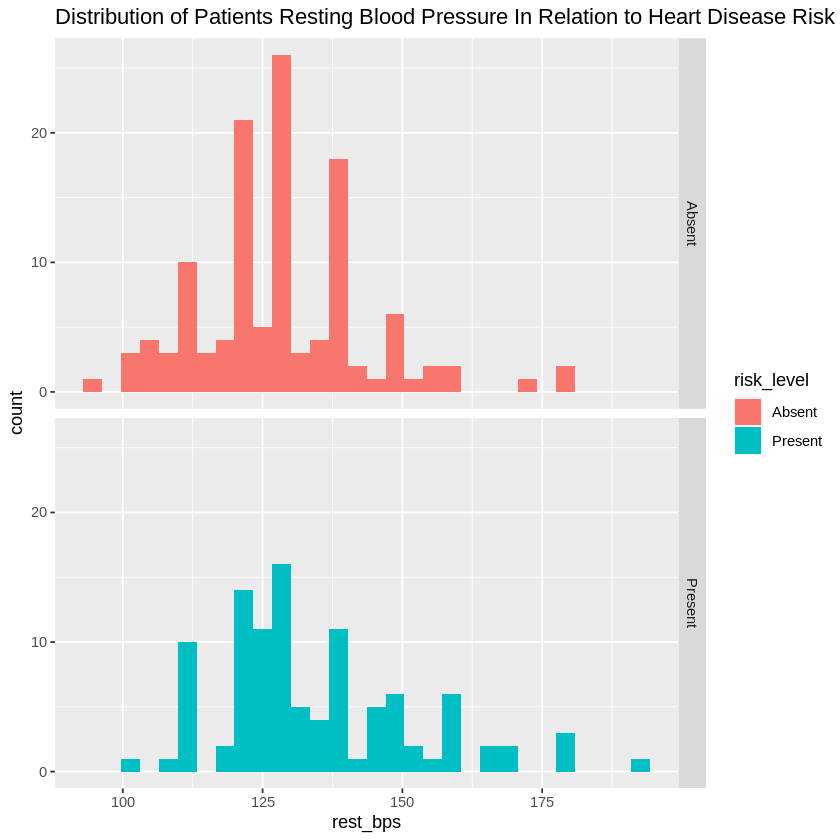

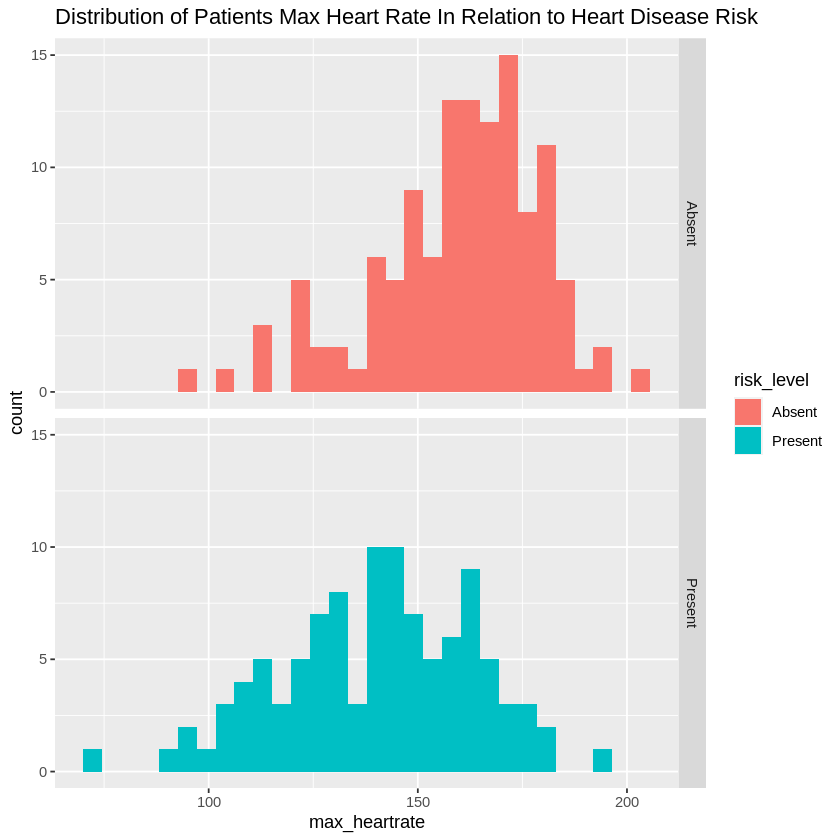

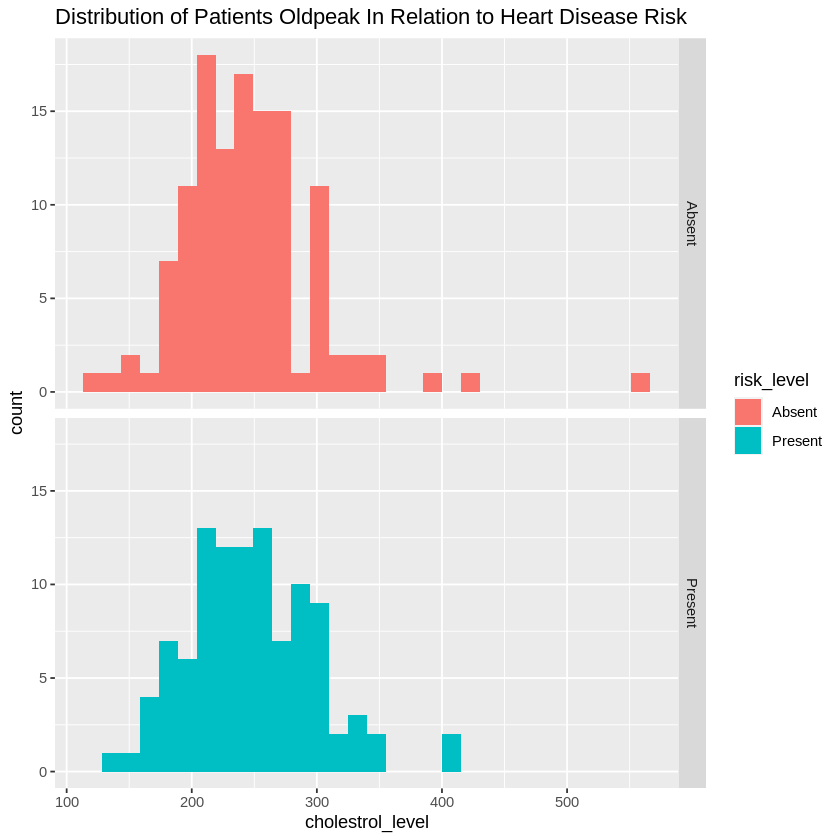

In [34]:
predictor_age <- cleveland_train |>
            ggplot(aes(age, fill = risk_level)) +
            geom_histogram(bins=30) +
            facet_grid(rows = vars(risk_level))+
            ggtitle("Distribution of Patients Age In Relation to Heart Disease Risk")
predictor_age

predictor_rest_bps<-cleveland_train |>
            ggplot(aes(rest_bps, fill = risk_level)) +
            geom_histogram(bins=30) +
            facet_grid(rows = vars(risk_level)) +
            ggtitle("Distribution of Patients Resting Blood Pressure In Relation to Heart Disease Risk")
predictor_rest_bps

predictor_max_heartrate<-cleveland_train |>
            ggplot(aes(max_heartrate, fill = risk_level)) +
            geom_histogram(bins=30) +
            facet_grid(rows = vars(risk_level)) +
            ggtitle("Distribution of Patients Max Heart Rate In Relation to Heart Disease Risk")
predictor_max_heartrate

predictor_oldpeak<-cleveland_train |>
            ggplot(aes(cholestrol_level, fill = risk_level)) +
            geom_histogram(bins=30) +
            facet_grid(rows = vars(risk_level)) +
            ggtitle("Distribution of Patients Oldpeak In Relation to Heart Disease Risk")
predictor_oldpeak


**Figure 1:** As observed in the visualizations above, while variables oldpeak and rest_bps showed very similar distribution between patients who are and are not at risk of a heart disease, age and max_heartrate showed differences in their distribution. Specifically, a high number of patients who are at risk seem to have a lower max_heart rate and are of higher ages than patients who are classified as not at risk. 

- Now that we have established that our predictor variables are Max Heart Rate and Age, we can use these predictor variables to train and code for a classification model to predict the class of any new incoming patient. We must then test the tarining model against the test dataset to determine which k-neighbours value, the number of datapoints closest to the new observation used in its prediction, has the highest probability success rate at predicting the correct class of any new incoming observations.

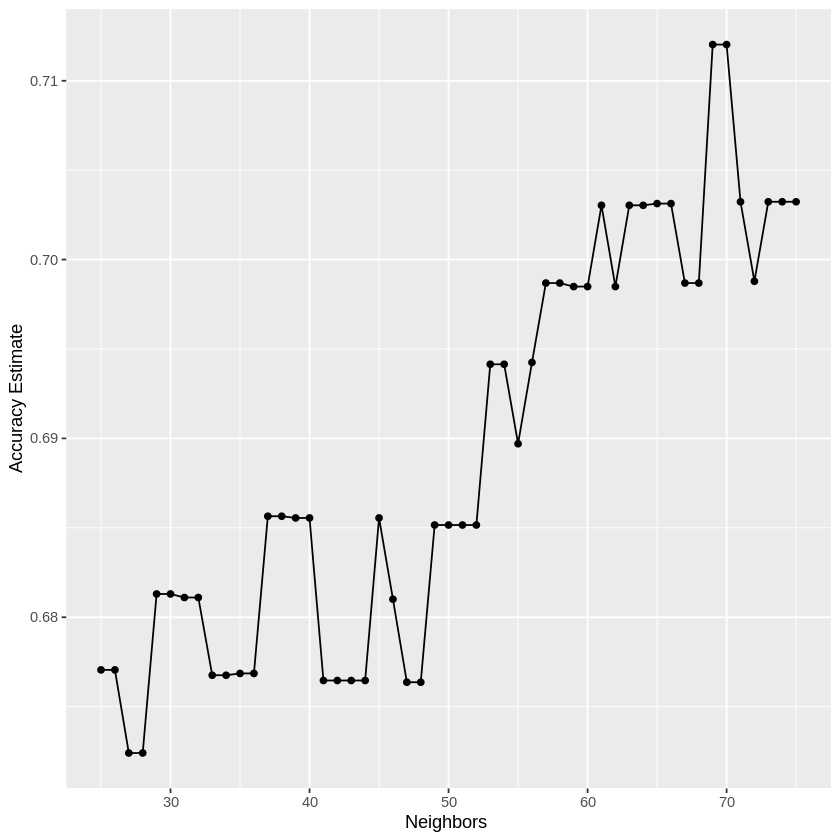

In [35]:
set.seed(2221)
heart_recipe <- recipe(risk_level ~ age+max_heartrate, data = cleveland_train) |>
                step_normalize(all_predictors())

heart_vfold <- vfold_cv(cleveland_train, v = 5, strata = risk_level)

heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 25, to = 75, by = 1))

heart_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(heart_tune) |>
      tune_grid(resamples = heart_vfold, grid = k_vals) |>
      collect_metrics()

accuracies <- heart_fit |> 
      filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors ", y = "Accuracy Estimate")

cross_val_plot

**Figure 2:** As seen in the Neighbours vs Accuracy Estimate above, using a k-neighbours value of 69, meaning any new observation will be compared with the closest 69 datapoints in the training data and classfied, will provide us with the highest accuracy.

**Reference:**

Heart Disease Data Set. *UCI Machine Learning Repository*. Retrieved April 2, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 